
# <span style="color:rgb(213,80,0)">Table-Based Battery block</span>

This script collects the open-circuit voltage and terminal voltage parameters of table-based battery block in model file and makes the plots of the parameters.


In [1]:
% Model to collect parameter values.
mdl = "BatteryHV_refsub_SystemTable";
% Block path to the target battery block.
blkpath = "/Battery/Battery (Table-Based)";


Collect parameter values from the battery block in the model.


In [2]:
fullblkpath = mdl + blkpath;
BatteryHV_harness_setup
load_system(mdl)

% State of charge ... independent variable 1
SOC_normalized = eval(get_param(fullblkpath, "SOC_vec"))';
SOC_pct = SOC_normalized * 100;

% Battery temperature ... independent variable 2
T_vec = eval(get_param(fullblkpath, "T_vec"));
T_vec_unit = get_param(fullblkpath, "T_vec_unit");
TemperatureStr = "" + eval(get_param(fullblkpath, "T_vec")) + " " + T_vec_unit

TemperatureStr = 1x3 string    
"0 degC"     "25 degC"    "60 degC"

In [3]:

% Open-circuit voltage, V0(SOC,T)
V0_mat = eval(get_param(fullblkpath, "V0_mat"))

V0_mat = 101x3    
    2.8000    2.9000    3.0000
    2.8200    2.9200    3.0338
    2.8400    2.9400    3.0672
    2.8600    2.9600    3.1001
    2.8800    2.9800    3.1322
    2.9000    3.0000    3.1635
    2.9200    3.0200    3.1937
    2.9400    3.0400    3.2226
    2.9600    3.0600    3.2501
    2.9800    3.0800    3.2760

In [4]:
V0_mat_unit = get_param(fullblkpath, "V0_mat_unit")

V0_mat_unit = 'V'

In [5]:

% Terminal resistance, R0(SOC,T)
R0_mat = eval(get_param(fullblkpath, "R0_mat"))

R0_mat = 101x3    
    0.4700    0.1700    0.1300
    0.4726    0.1582    0.0955
    0.4719    0.1469    0.0614
    0.4679    0.1364    0.0320
    0.4606    0.1273    0.0118
    0.4500    0.1200    0.0050
    0.4342    0.1137    0.0071
    0.4126    0.1074    0.0105
    0.3867    0.1011    0.0147
    0.3582    0.0951    0.0195

In [6]:
R0_mat_unit = get_param(fullblkpath, "R0_mat_unit")

R0_mat_unit = 'Ohm'

## Open-ciruit voltage


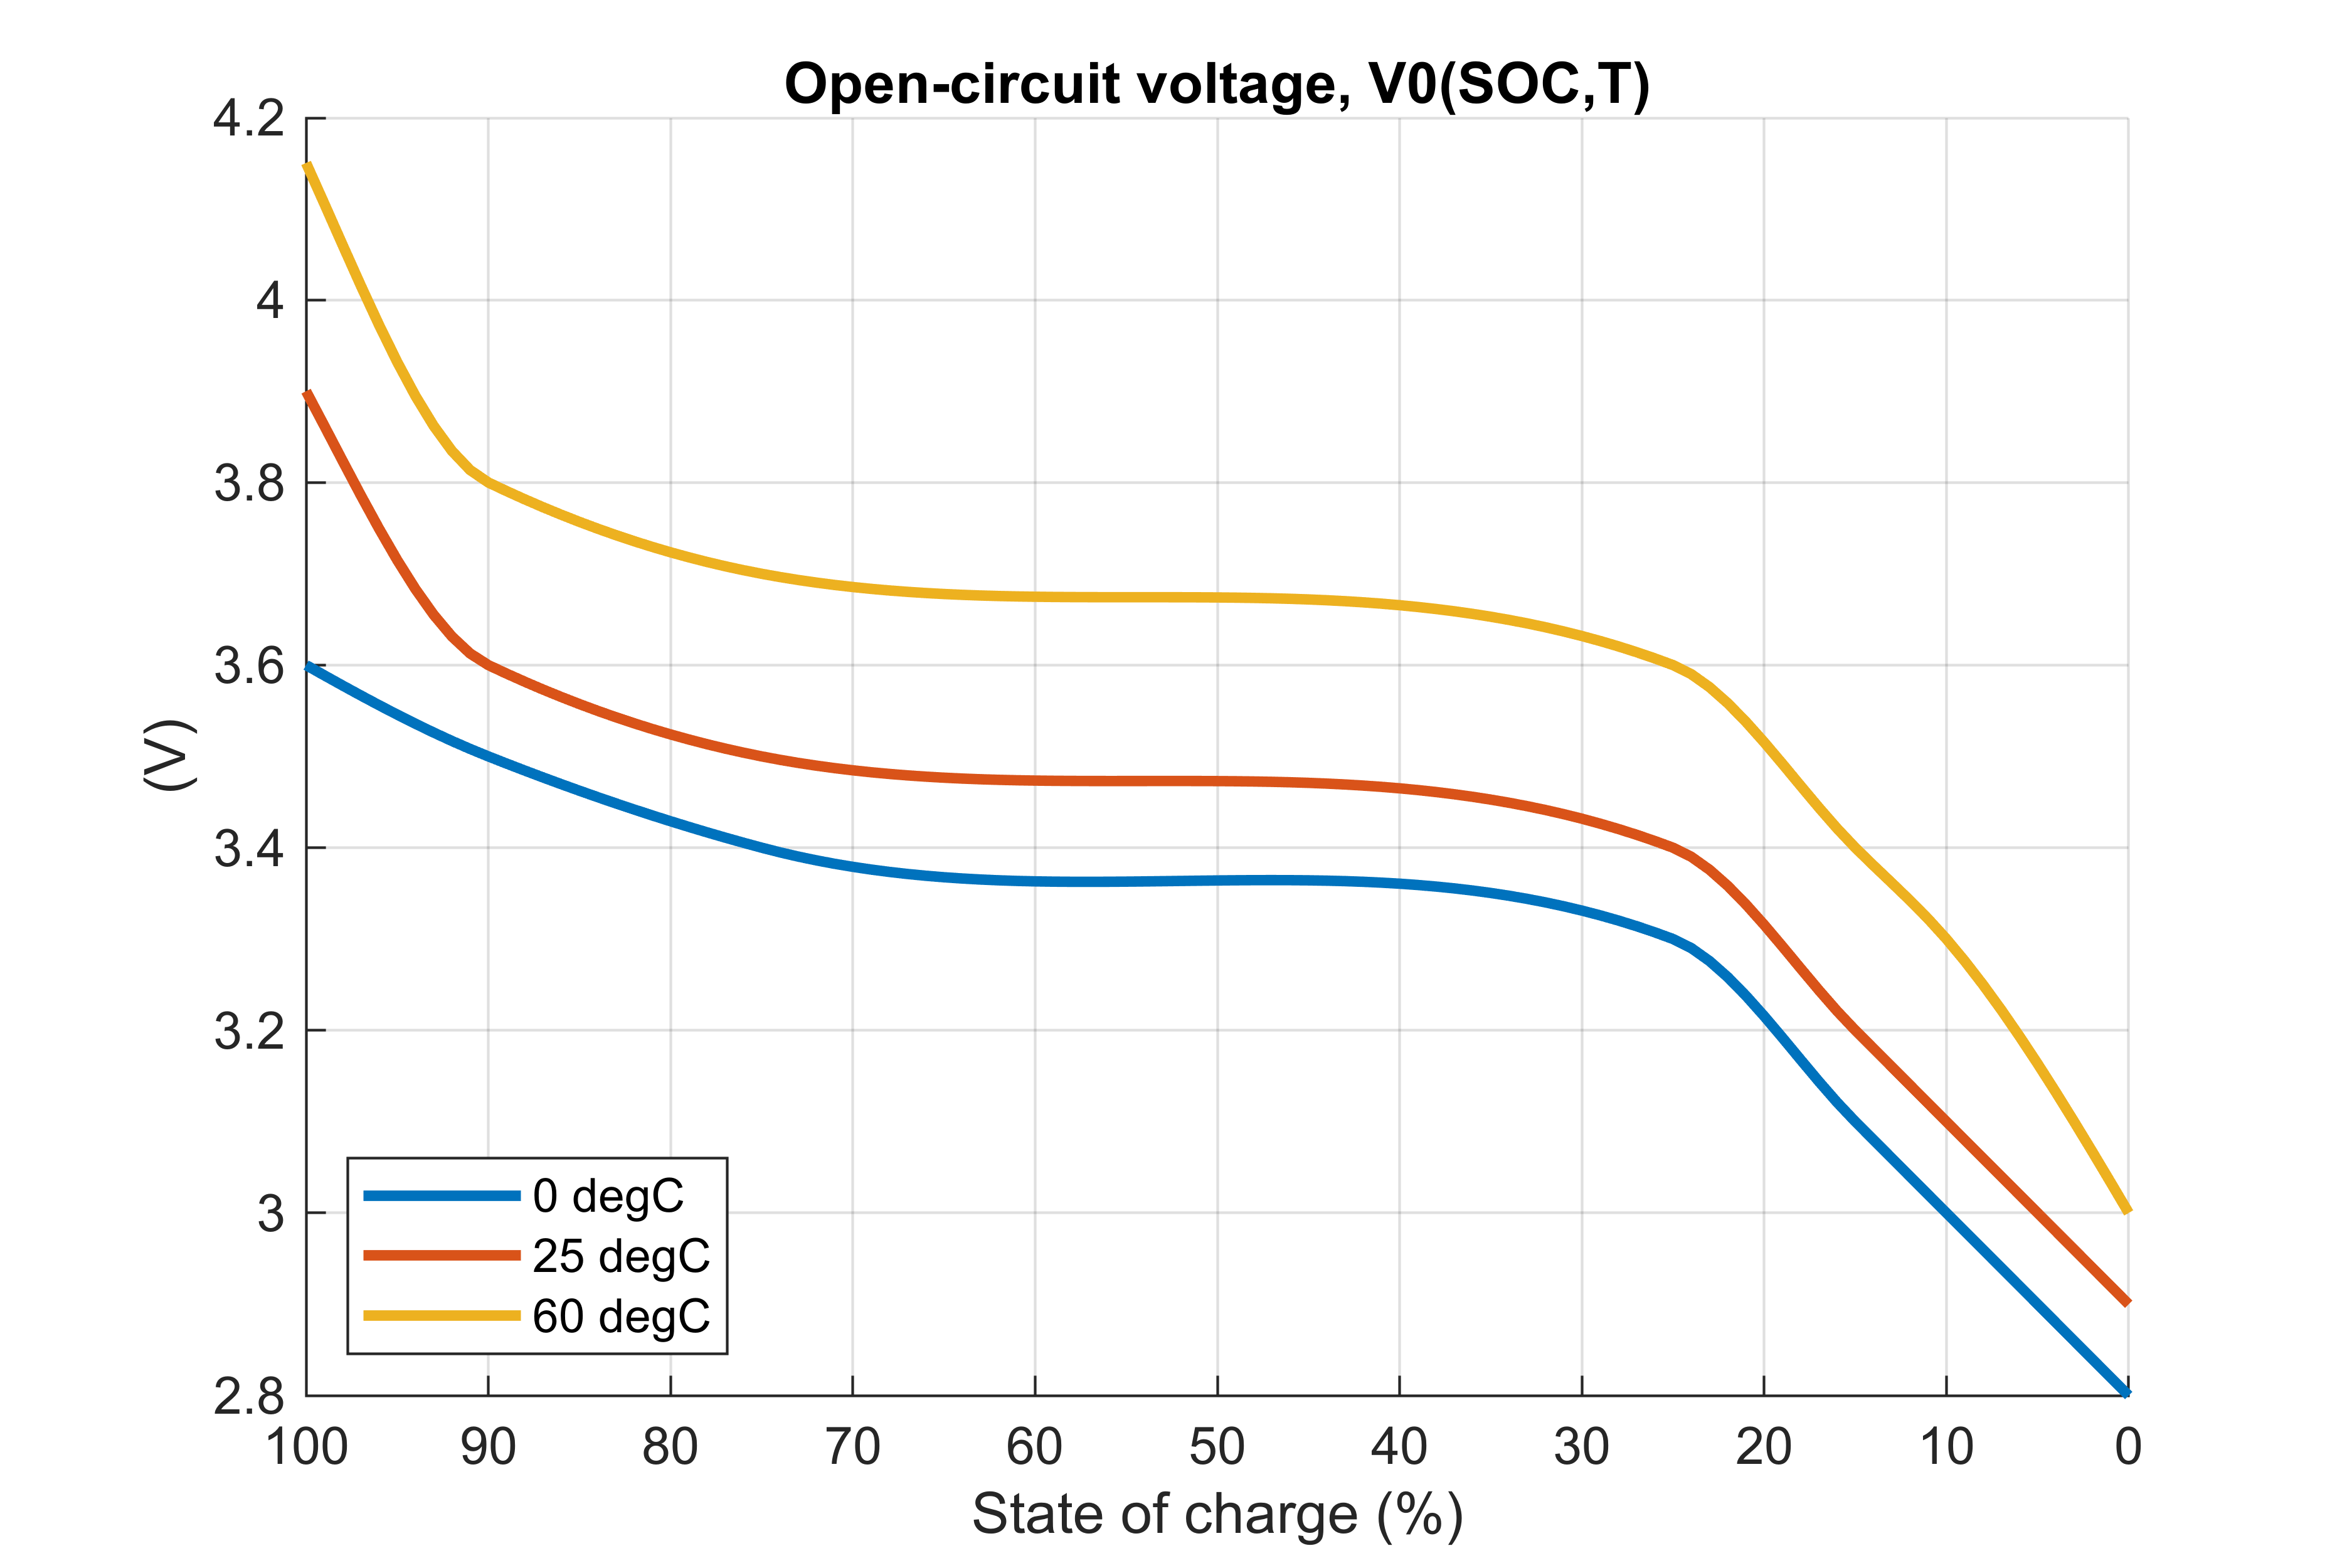

In [7]:
fig = figure;
fig.Position(3:4) = [600 400];
hold on
grid on
for idx = 1 : numel(T_vec)
  plot(SOC_pct, V0_mat(:,idx), LineWidth=2)
end
set(gca, xdir = "reverse")
legend(TemperatureStr, Location="southwest")
xlabel("State of charge (%)")
ylabel("(" + V0_mat_unit + ")")
title("Open-circuit voltage, V0(SOC,T)")

## Terminal resistance


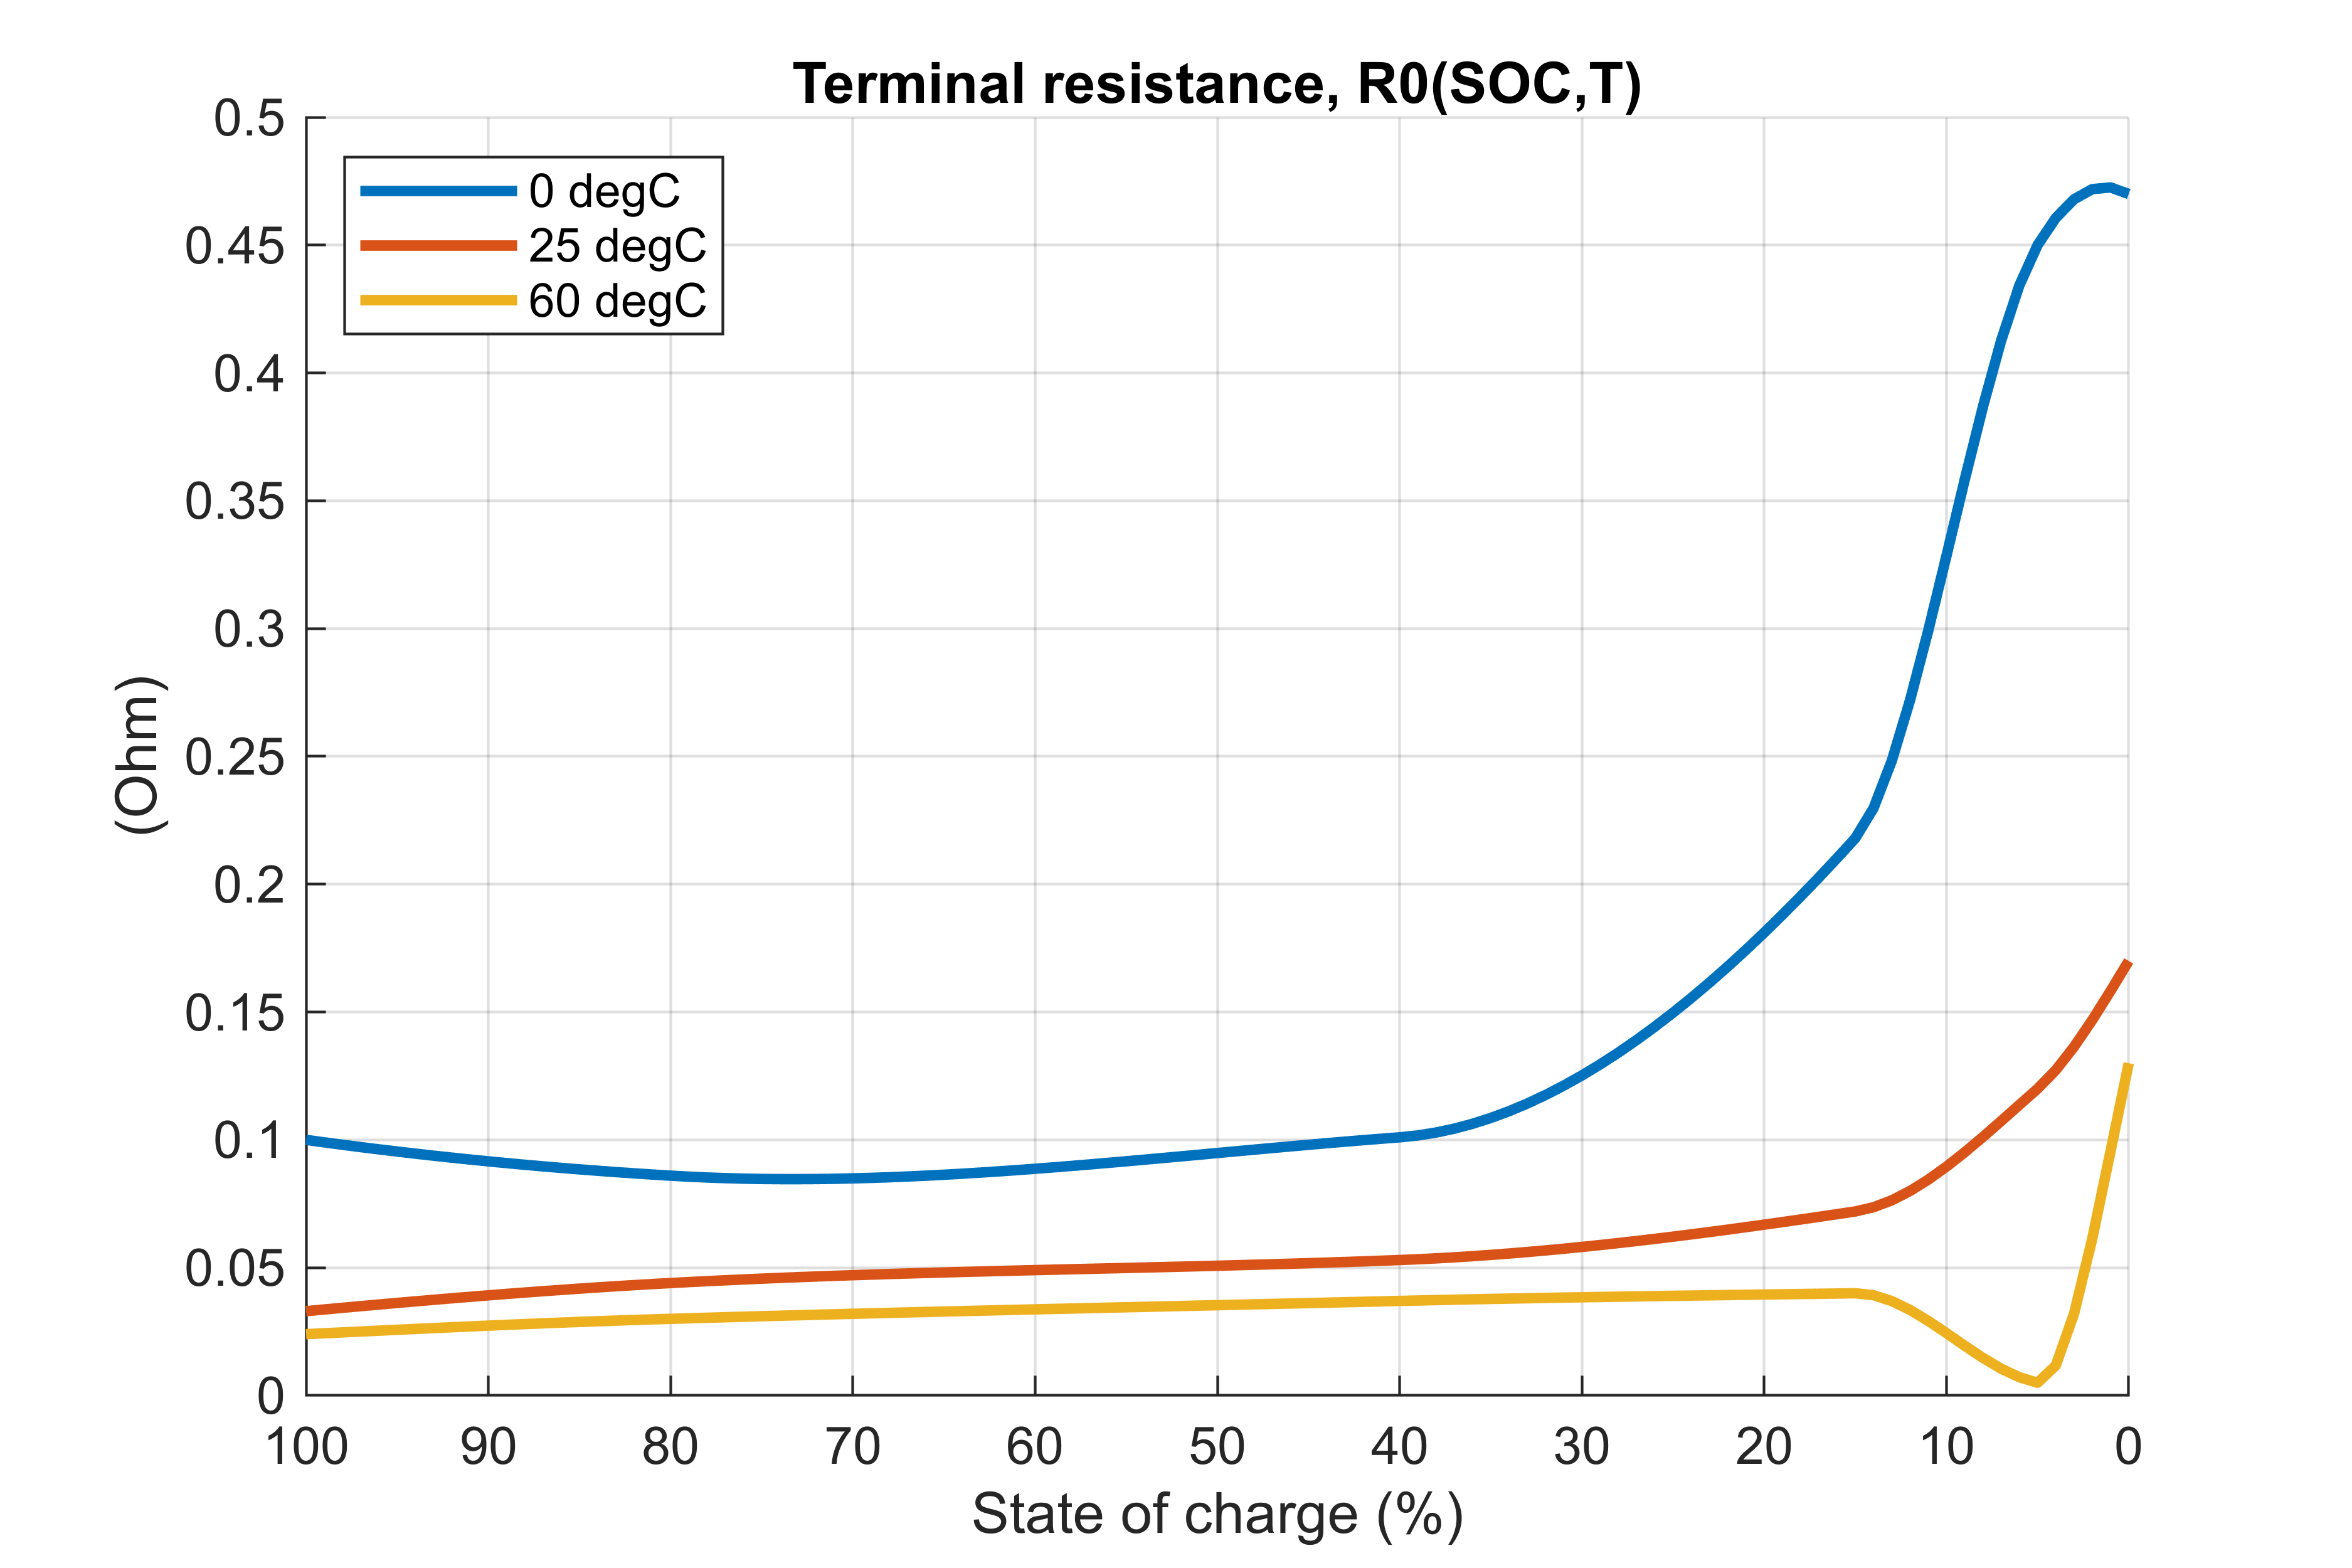

In [8]:
fig = figure;
fig.Position(3:4) = [600 400];
hold on
grid on
for idx = 1 : numel(T_vec)
  plot(SOC_pct, R0_mat(:,idx), LineWidth=2)
end
set(gca, xdir = "reverse")
legend(TemperatureStr, Location="best")
xlabel("State of charge (%)")
ylabel("(" + R0_mat_unit + ")")
title("Terminal resistance, R0(SOC,T)")


*Copyright 2023 The MathWorks, Inc.*

